**მონაცემთა ანალიზი პითონის გამოყენებით**
<br>

სათაური: **ლექცია №6: SciPy: სამეცნიერო ინსტრუმენტები**
<br>
მომხსენებელი: **შოთა ცისკარიძე**

წყარო: https://habr.com/ru/post/557424/

<h1 align="center">SciPy: სამეცნიერო ინსტრუმენტები</h1>

<h3 align="center">რა არის SciPy?</h3>

- **SciPy** არის მათემატიკური ალგორითმების და დამხმარე ფუნქციების ნაკრები, რომელიც აგებულია **NumPy** მონაცემთა სტრუქტურებზე: 

  http://www.scipy.org/


- **SciPy** საშუალებით შესაძლებელია მონაცემთა დამუშავება და პროტოტიპური გარემოს შექმნა, რომელიც კონკურენციას უწევს **MATLAB**-ს;


- **SciPy** ორგანიზებულია ქვეპაკეტებში (**Submodules**), რომლებიც მოიცავს სხვადასხვა დარგის სამეცნიერო გამოთვლებს. 
<br> მოდულების სრული დოკუმენტაციაში შეგიძლიათ იხილოთ აქ: 

  http://docs.scipy.org/doc/scipy/reference/


- **SciPy**-ის ყველაზე ცნობილი მოდულებია:
  - სპეციალური ფუნქციები (scipy.special)
  - წრფივი ალგებრა (scipy.linalg)
  - ოპტიმიზაცია (scipy.optimize)
  - ინტერპოლაცია (scipy.interpolate)
  - *ინტეგრირება (scipy.integrate)
  - **ფურიეს ტრანსფორმაციები (scipy.fftpack)**
  - **სიგნალის დამუშავება (scipy.signal)**
  - **სტატისტიკა (scipy.stats)**
  - სურათის მრავალგანზომილებიანი დამუშავება (scipy.ndimage)
  - File IO (scipy.io)  
  - Და მეტი...


<h3 align="center">$\texttt{scipy.stats}$ - ჩვეულებრივი დიფერენციალური განტოლებების ამოხსნა</h3>

- $\texttt{scipy.stats}$ მოდული შეიცავს მათემატიკური სტატისტიკის მრავალფეროვან ინსტრუმენტებს.


- განვიხილოთ ამოცანა რომელიც შედგება შემდეგი პუნქტებიდან:
  - განაწილების ფუნქციის განსაზღვრა (ჩვენს შემთხევაში გაუსის განაწილება);
  - განსაზღვირს არის არჩევა;
  - მონაცემების გენერაცია (ჩვენს შემთხვევაში 1000 მონაცემის);
  - გაუსის ხმაურის დამატება;
  - ბინის არჩევა და ჰისტოგრამის აგება (ჩვენს შემთხვევაში ბინის რაოდენობაა 20);
  - ჰისტოგრამის ნორმალიზაცია;
  - მიღებული ჰისტოგრამის ფიტირება;
  - საბოლოო გრაფიკის აგება, რომელიც აჩვენებს: 
    - თავდაპირველ განაწილებას;
    - დაკვირვების შედეგად მიღებულ ჰისტოგრამას
    - ფიტირებულ განაწილებას.


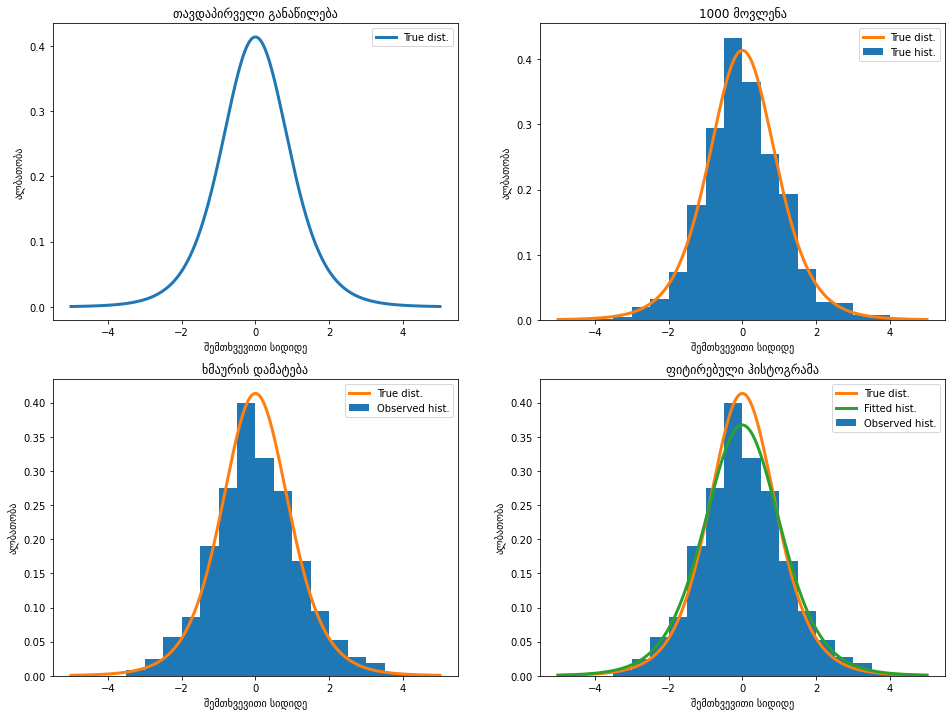

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

dof = 9
raw = np.random.standard_t(dof, [1000])
noise = np.random.normal(0, 0.5, size = [1000])
lnspc = np.linspace(-5, 5, 1000)

data = raw + noise

plt.figure(figsize=(16, 12)) 

plt.subplot(221)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 1-ი პოზიცია
p = stats.t.fit(raw, dof)
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('თავდაპირველი განაწილება')
plt.legend()

plt.subplot(222)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 2-ი პოზიცია  
plt.hist(raw, bins = 20, range=[-5, 5], density = True, label='True hist.')
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('1000 მოვლენა')
plt.legend()

plt.subplot(223)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 3-ი პოზიცია  
hist = plt.hist(data, bins = 20, range=[-5, 5], density = True, label='Observed hist.')
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('ხმაურის დამატება')
plt.legend()

plt.subplot(224)    # ნაკვეთის არჩევა 221 = 2 სვეტი + 2 სტრიქონი + 4-ი პოზიცია  
hist = plt.hist(data, bins = 20, range=[-5, 5], density = True, label='Observed hist.')
p = stats.t.fit(raw, dof)
pdf_g = stats.t.pdf(lnspc, p[0], p[1], p[2])
plt.plot(lnspc, pdf_g, linewidth = 3, label='True dist.') 
p_noised = stats.t.fit(data, dof)
pdf_g_noised = stats.t.pdf(lnspc, p_noised[0], p_noised[1], p_noised[2])
plt.plot(lnspc, pdf_g_noised, linewidth = 3, label='Fitted hist.')
plt.xlabel('შემთხვევითი სიდიდე')
plt.ylabel('ალბათობა')
plt.title('ფიტირებული ჰისტოგრამა')
plt.legend()

- ახლა წარმოვიდგინოთ, რომ წლის განმავლობაში ჩვენ სახლში პიცას ვუკვეთავთ, ყოველთვის, როდესაც კედლის საათს ვუყურებთ

- შეკვეთასა და მიწოდებას შორის გატარებული დროის აღნიშვნას, წუთების მთელ რაოდენობას

- წლის განმავლობაში დაგროვილი მონაცემები პიცის მიწოდების შესახებ შეიძლება ასე გამოიყურებოდეს:

In [3]:
norm_rv = stats.norm(loc=30, scale=5)
samples = np.trunc(norm_rv.rvs(365))
samples[:30]

array([34., 29., 28., 26., 27., 24., 29., 40., 35., 33., 33., 34., 29.,
       35., 33., 33., 21., 31., 35., 29., 24., 24., 29., 35., 31., 30.,
       33., 34., 33., 32.])

- რა თქმა უნდა, ჩვენვ გვაინტერესებს პიცის მიწოდების საშუალო დრო და მისი სტანდარტული გადახრა:

In [4]:
samples.mean(), samples.std()

(29.6, 5.153958446789504)

- შეგვიძლია ითქვას, რომ პიცისთვის მიწოდების დრო დაახლოებით $30 \pm 5$ წუთს შეადგენს

- მოდით ავაგოთ გრაფიკი

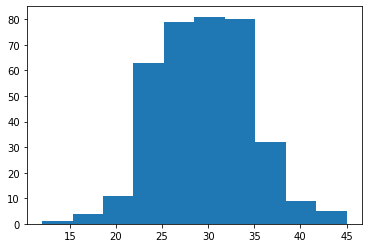

In [5]:
plt.hist(samples);

- გამოვიყენოთ seaborn-ი გრაფიკის გასაუმჯობესებლად:

<AxesSubplot:ylabel='Count'>

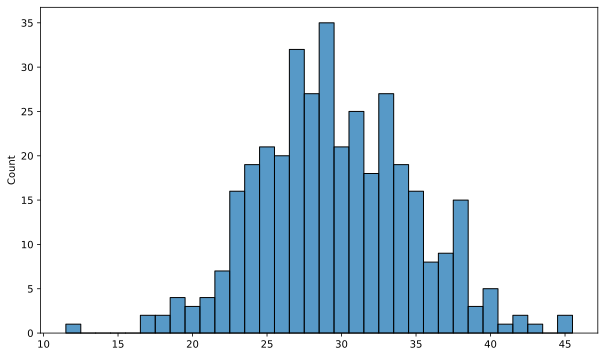

In [6]:
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

sns.histplot(x=samples, discrete=True)

- გრაფიკის დათვალიერებისას, შეიძლება ვიფიქროთ, რომ პიცას მოტანის დრო ნორმალური განაწილებაა $\mu = 30$ და $\sigma = 5$ პარამეტრებით. 


- მაგრამ რატომ გადავწყვიტეთ რომ განაწილება მაინდამაინც ნორმალურია? იმის გამო, რომ ჰისტოგრამა კარგად გამოიყურება? 


- თუ ჩვენ ვსაუბრობთ ვიზუალურ გემოვნებაზე, მაშინ ჩვენ ასევე შეგვიძლია გამოგვეყენებინა გამა, ბეტა და სამკუთხა განაწილების სიმკვრივის განაწილების ფუნქციები:

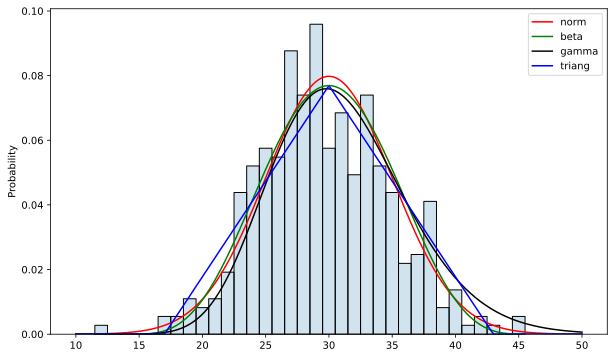

In [9]:
norm_rv = stats.norm(loc=30, scale=5)
beta_rv = stats.beta(a=5, b=5, loc=14, scale=32)
gamma_rv = stats.gamma(a = 20, loc = 7, scale=1.2)
tri_rv = stats.triang(c=0.5, loc=17, scale=26)

x = np.linspace(10, 50, 300)

sns.lineplot(x = x, y = norm_rv.pdf(x), color='r', label='norm')
sns.lineplot(x = x, y = beta_rv.pdf(x), color='g', label='beta')
sns.lineplot(x = x, y = gamma_rv.pdf(x), color='k', label='gamma')
sns.lineplot(x = x, y = tri_rv.pdf(x), color='b', label='triang')

sns.histplot(x=samples, discrete=True, stat='probability',
             alpha=0.2);

- მოდით დავადგინოთ, მართლაც არის თუ არა ეს განაწილება ზუსტად ნორმალური?


- კურიერს, რომელსაც მოაქვს პიცა, შეიძლება გზაში გადახდეს მრავალი შემთხვევითი მოვლენა:

  - გზაჯვარედინზე ორი წუთი უნდა დაელოდოს შუქნიშანს გამწვანებას;

  - მუხლი იტკინა და ჩვეულებრივზე მეტხანს იარა;

  - სკეიტბორდით მოძრაობს და ჩვეულებრივზე სწრაფად გადაადგილდება;

  - შავმა კატამ გზა გადურვინა და გადაწყვიტა სხვა გზით წამოსულიყო;

- რა თქმა უნდა, უამრავი ასეთი მოვლენის გამოგონება შეგვიძლია


- ჩვენთვის მხოლოდ მნიშვნელოვანია, რომ ეს მოვლენები აღწერილი იყოს ისეთი ცვლადებით, რომელთა მნიშვნელობები თანაბრად სავარაუდოა, ე.ი. განაწილებულია ერთიანი კანონის შესაბამისად. 


- მაგალითად, შეიძლება ვიფიქროთ ცვლადზე $X_{1}$, რომელიც აღწერს შუქნიშნის მწვანე შუქის ლოდინს


- თუ ეს დრო არის ნოლიდან ოთხ წუთამდე, დღეს ეს დრო შეიძლება იყოს:

In [10]:
unif_rv = stats.uniform(loc=0, scale=4)
unif_rv.rvs()

1.49816047538945

- ხვალ, ზეგ და მაზეგ კი ეს დრო შეიძლება ტოლი იყოს:

In [11]:
unif_rv.rvs(size=3)


array([3.80285723, 2.92797577, 2.39463394])

- მოდით ახლა წარმოვიდგინოთ, რომ არსებობს 15 ასეთი ცვლადი (მიზეზი) და თითოეული მათგანი გავლენას ახდენს მიწოდების მთლიან დროზე.


- თუ ჩვენ გვაქვს მხოლოდ 15 შემთხვევითი სიდიდე: $X_{1}, X_{2}, .., X_{15}$, მაშინ შეგვიძლია ვთქვათ, რომ მიწოდების საერთო დრო არის ამ შემთხვევითი სიდიდეების ჯამი და ასევე არის შემთხვევითი სიდიდე, რომელიც შეიძლება იყოს აღინიშნება $Y$-ით:

  $$Y = X_{1} + X_{2} + .. + X_{15} = \sum_ {i = 1}^{15} X_{i}$$
 

- მაგრამ თუ თითოეული შემთხვევითი სიდიდე $X_{1}, X_{2}, .., X_{15}$ თანაბრად არის განაწილებული, მაშინ როგორ იქნება განაწილებული ცვლადი $Y$? 


- მოდით შევქმნათ 10,000 მოვლენა და დავხედოთ ჰისტოგრამას:

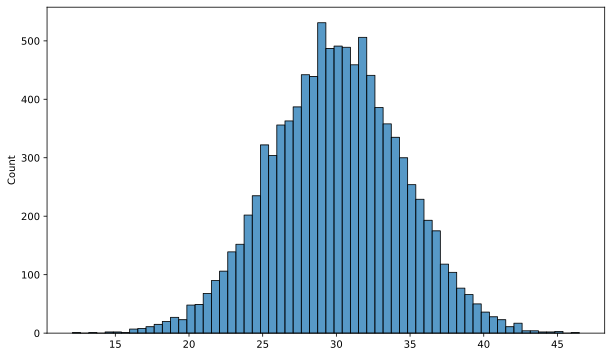

In [12]:
Y_samples = [unif_rv.rvs(size=15).sum() for i in range(10000)]
sns.histplot(x=Y_samples);

- წააგავს თუ არა ეს ჰისტოგრამა ნორმალურ განაწილებას? 


- თუ თქვენ თვლით რომ კი, მაშინ თქვენ გესმით ცენტრალური სასაზღვრო თეორემის მნიშვნელობა: 

  შემთხვევითი სიდიდეების ჯამის განაწილება ნორმალური განაწილებისკენ მიისწრაფვის ამ ჯამში წევრების რაოდენობის ზრდასთან ერთად.

### Z - მნიშვნელობები

- დავუშვათ, რომ ერთი წლის შემდეგ ახალი მეზობელი გაგიჩნდათ და მან, თქვენსავით, გადაწყვიტა ყოველდღე პიცის შეკვეთა. 


- სამი დღის შემდეგ კი ეს მეზობელი აცხადებს, რომ ის პიცის კურიერს ძალიან დიდხანს ელოდება. 


- ჩვენ ვცდილობთ კურიერი დავიცვათ, და ვეუბნებით მეზობელს, რომ მიწოდების საშუალოდ დრო 30 წუთს შეადგენს, $\pm$5 წუთი, რაზეც მეზობელი პასუხობს, რომ მან სამი შეკვეთა გააკეთა და კურიერმა შეკვეთის მოტანას სამივეჯერ 40 წუთზე მეტი მოანდომა.


- რატომ არის მეზობელი ასე დარწმუნებული თავის სიმართლეში?

- ალბათ, ის სხვების მსხგავსად ფიქრობს, რომ 30 წუთს ნიშნავს, რომ შეკვეთის მოწოდებას დასჭირდება 27, 31, თუნდაც 35 წუთი, მაგრამ არა 23 ან 38 წუთი. 


- ამასთან, ჩვენ პიცა შევუკვეთეთ 365-ჯერ და ვიცით, რომ მიწოდებას შეიძლება 20 ან თუნდაც 45 წუთი დასჭირდეს. ხოლო ფრაზა $30 \pm 5$ წუთი ნიშნავს მხოლოდ იმას, რომ მიწოდების მნიშვნელოვანი ნაწილი 25-დან 35 წუთამდეა. 


- განაწილების პარამეტრების ცოდნით, ჩვენ შეგვიძლია რამდენიმე ათასი მიწოდების მოდელირება და შედეგის შეფასება:

In [13]:
N = 5000
t_data = norm_rv.rvs(N)
t_data[(25 < t_data) & (t_data < 35)].size/N

0.697

- მნიშვნელობების დაახლოებით ორი მესამედი მოდის ინტერვალში 25-დან 35 წუთამდე. 


- რამდენი მნიშვნელობა გადააჭარბებს 40 წუთს?

In [14]:
t_data[t_data > 40].size/N


0.0258

- გამოდის, რომ ღირებულებების მხოლოდ ორ პროცენტზე ოდნავ მეტია 40 წუთზე მეტი. 


- მაგრამ მეზობელმა ზედიზედ სამჯერ შეუკვეთა პიცა და სამივეჯერ მიწოდებას 40 წუთზე მეტი დასჭირდა. 


- შესაძლოა მეზობელი აღმოჩნდა ძალიან უიღბლო, რადგან სამი ასეთი მიწოდების ალბათობაა:

  $$0.02^3$$

In [16]:
0.0258**3

1.7173512e-05

- რა თქმა უნდა, კომპიუტერული ითვლის ამ მნიშვნელობებს ძალიან კარგია.


- მაგრამ ამ შემთხვევაში უმჯობესია გამოიყენოთ ეგრეთ წოდებული $Z$-მნიშვნელობები.


- $Z$-მნიშვნელობა შეგიძლიათ გამოთვალოთ შემდეგი ფორმულის გამოყენებით:

  $$Z = \frac{y - \mu}{\sigma}$$
  
  სადაც $y$ არის მიწოდების დრო, ე.ი. შემთხვევითი სიდიდის ზოგიერთი განსაკუთრებული მნიშვნელობა, რომელსაც აქვს ნორმალური განაწილება და $\mu$ და $\sigma$ არის მათემატიკური ლოდინი და სტანდარტული გადახრა


- ჩვენს შემთხვევაში, განაწილების პარამეტრები შესაბამისად 30 და 5 წუთის ტოლია. 


- მოდით გამოვთვალოთ $Z$ მნიშვნელობა 40-ი წუთისთვის:

 $$Z = \frac{40 - 30}{5} = 2$$
 

- მაგრამ, როგორ მოვახდინოთ ამ შედეგის ინტერტრეტირება და საერთოდ რატომ გამოვიყენეთ $Z$-მნიშვნელობა? 

  ამის გასაგებად, ცოტა უნდა "დახატოთ":


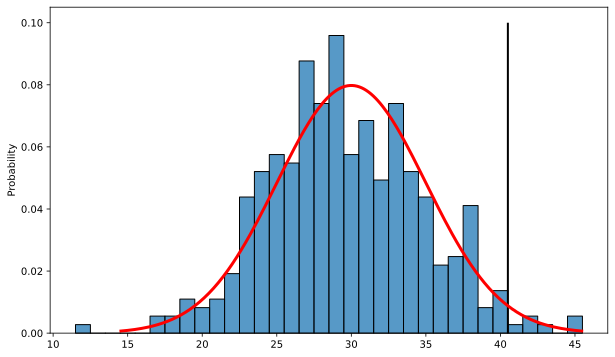

In [15]:
fig, ax = plt.subplots()
x = np.linspace(norm_rv.ppf(0.001), norm_rv.ppf(0.999), 200)
ax.vlines(40.5, 0, 0.1, color='k', lw=2)
sns.lineplot(x=x, y=norm_rv.pdf(x), color='r', lw=3)
sns.histplot(x=samples, stat='probability', discrete=True);

- ამ გრაფიკზე, ჩვენ გამოვსახეთ ჩვენი მონაცემების ნიმუშების ჰისტოგრამა, მაგრამ ახლა მართკუთხედების სიმაღლე არ აჩვენებს თითოეული მნიშვნელობის რაოდენობას, არამედ ალბათობას. 


- წითელი ხაზით აღნიშნულია ნამდვილი ალბათობის სიმკვრივის განაწილების ფუნქცია. 


- ეს გრფიკი გვეუბნება, რომ ორი გზა არსებობს:

  პირველი არის ექსპერიმენტული, ე.ი. ჩვენ ვქმნით 5000 მონაცემებს, ვაგებთ ჰისტოგრამას და ვპოულობთ მართკუთხედების სიმაღლის ჯამს, რომელიც მდებარეობს შავი ხაზის მარჯვნივ:

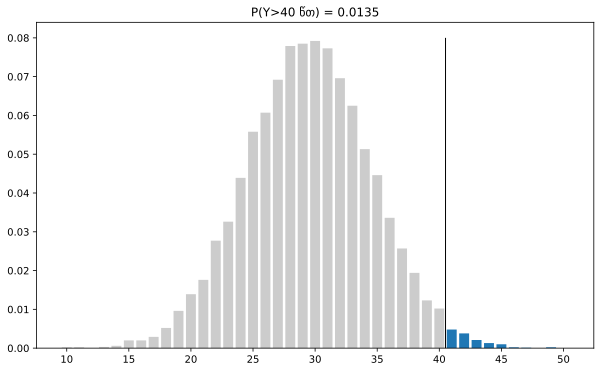

In [17]:
np.random.seed(42)
N = 10000
values = np.trunc(norm_rv.rvs(N))

fig, ax = plt.subplots()
v_le_41 = np.histogram(values, np.arange(9.5, 41.5))
v_ge_40 = np.histogram(values, np.arange(40.5, 51.5))
ax.bar(np.arange(10, 41), v_le_41[0]/N, color='0.8')
ax.bar(np.arange(41, 51), v_ge_40[0]/N)
p = np.sum(v_ge_40[0]/N)
ax.set_title('P(Y>40 წთ) = {:.3}'.format(p))
ax.vlines(40.5, 0, 0.08, color='k', lw=1);

- მეორე გზა არის ანალიტიკური:

  მას შემდეგ, რაც ვიცით, რომ პიცის მიწოდების მნიშვნელობები აღებულია ჩვეულებრივი განაწილებიდან, შეგვიძლია გამოვიყენოთ ნორმალური განაწილების ალბათობის სიმკვრივის განაწილების ფუნქცია. 
  
  სიმკვრივის განაწილების ფუნქცია კარგია იმაში, რომ მის ქვეშ არსებული ფართობი ყოველთვის ტოლია ერთისა და თუ გვაინტერესებს ალბათობა იმისა, რომ მნიშვნელობა მიიღებს მნიშვნელობას აღნიშნულ მნიშვნელობაზე მეტი ან ნაკლები, მაშინ საკმარისია ვიპოვოთ ფართობი, რომელიც არის ამ მნიშვნელობის მარჯვნივ ან მარცხნივ. 
  
  მაგალითად, ჩვენ შეგიძლიათ გამოთვალოთ და ავსახოთ ალბათობა, რომ მიწოდების დრო 40 წუთზე მეტხანს გაგრძელდება შემდეგნაირად:

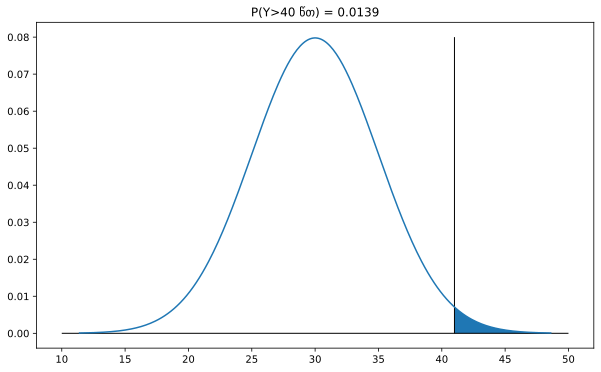

In [18]:
fig, ax = plt.subplots()

x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 300)
ax.plot(x, norm_rv.pdf(x))

ax.fill_between(x[x>41], norm_rv.pdf(x[x>41]), np.zeros(len(x[x>41])))
p = 1 - norm_rv.cdf(41)
ax.set_title('P(Y>40 წთ) = {:.3}'.format(p))
ax.hlines(0, 10, 50, lw=1, color='k')
ax.vlines(41, 0, 0.08, color='k', lw=1);

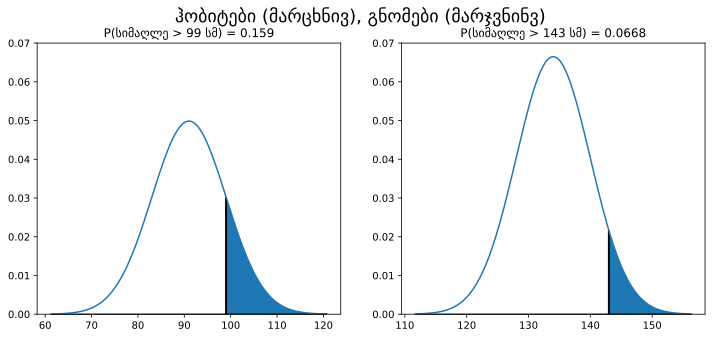

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))

nrv_hobbit = stats.norm(91, 8)
nrv_gnome = stats.norm(134, 6)

for i, (func, h) in enumerate(zip((nrv_hobbit, nrv_gnome), (99, 143))):
    x = np.linspace(func.ppf(0.0001), func.ppf(0.9999), 300)
    ax[i].plot(x, func.pdf(x))
    ax[i].fill_between(x[x>h], func.pdf(x[x>h]), np.zeros(len(x[x>h])))
    p = 1 - func.cdf(h)
    ax[i].set_title('P(სიმაღლე > {} სმ) = {:.3}'.format(h, p))
    ax[i].hlines(0, func.ppf(0.0001), func.ppf(0.9999), lw=1, color='k')
    ax[i].vlines(h, 0, func.pdf(h), color='k', lw=2)
    ax[i].set_ylim(0, 0.07)
fig.suptitle('ჰობიტები (მარცხნივ), გნომები (მარჯვნინვ)', fontsize = 18);

- მოდით ახლა დავუშვათ, რომ ჩვენ აღმოვჩნდით ტოლკიენის სამყაროში და რატომღაც გავარკვიეთ, რომ ჰობიტების და გნომების ზრდა სანტიმეტრებში ნაწილდება როგორც $N(91; 8^{2})$ და $N(134; 6^{2})$. 


- თუ ფროდოს სიმაღლე 99 სანტიმეტრია, ხოლო გიმლის 143 სანტიმეტრი, მაშინ როგორ უნდა გავიგოთ, ვის სიმაღლეა უფრო დამახასიათებელი მათ მოსახლეობაში? 


- ამის გასარკვევად, ჩვენ შეგვიძლია ავსახოს ალბათობის სიმკვრივის განაწილების ფუნქცია თითოეული ადამიანისთვის, აღნიშნული მნიშვნელობებით და ამავე დროს განვსაზღვროთ მათი წილი, ვინც აღემატება ამ მნიშვნელობებს:

- ამ გრაფიკიდან არ არის პირდაპირ ცხადი, მაგრამ პრინციპში, შეიძლება ითქვას (და ალბათ სწორიც იქნება), რომ ფროდოს ზრდა გარკვეულწილად უფრო ახლოს არის განაწილების მწვერვალთან, ვიდრე გიმლის. 


- ეს ნიშნავს, რომ ფროდოს იმავე სიმაღლის ჰობიტის შეხვედრის ალბათობა ოდნავ უფრო მეტია ვიდრე, რომ გნომის, რომელიც გიმლის სიმაღ₾ისაა. სწორედ ეს იგულისხმება სიტყვაში "ტიპიური".


- ტიპიურობის შედარება Z- მნიშვნელობების გამოყენებით ბევრად უფრო მარტივი და გასაგებია:


$$Z_{ფროდო} = \frac{99-91}{8}=1$$

$$Z_{გიმლი} = \frac{143-134}{6}=1.5$$

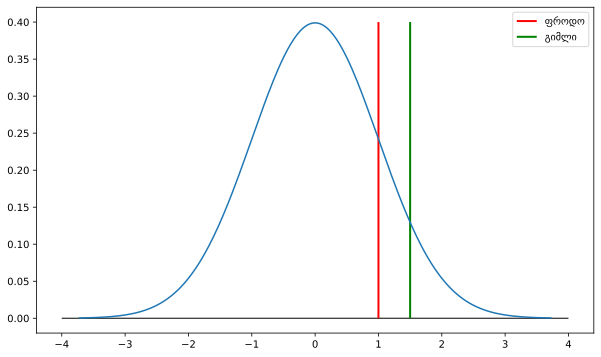

In [20]:
fig, ax = plt.subplots()
N_rv = stats.norm()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, -4, 4, lw=1, color='k')
ax.vlines(1, 0, 0.4, color='r', lw=2, label='ფროდო')
ax.vlines(1.5, 0, 0.4, color='g', lw=2, label='გიმლი')
ax.legend();

- ახლა მოდით დავუბრუნდეთ ჩვენს მეზობელს, რომელიც აღშფოთებულია პიცის მიწოდების ლოდინით. 


- ზემოთ, ჩვენ გამოვთვალეთ Z მნიშვნელობა 40 წუთის განმავლობაში:

  $$Z = \frac{40-30}{5} = 2$$

- ჩვენ ჯერ არ გვაქვს საკმარისი გამოცდილება, რომ პირდაპირ ვთქვათ ბევრი ეს თუ ცოტა, ამიტომ უმჯობესია მნიშვნელობა გრაფიკულად გამოვსახოთ:

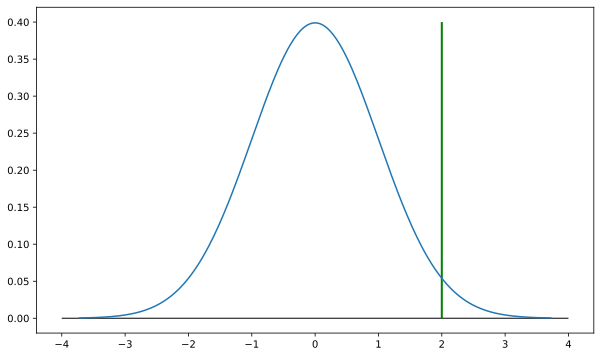

In [23]:
fig, ax = plt.subplots()
N_rv = stats.norm()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, -4, 4, lw=1, color='k')
ax.vlines(2, 0, 0.4, color='g', lw=2);

- ეს მნიშვნელობა მდებარეობს მარჯვნივ $2\sigma$ მანძილზე, რაც საკმაოდ ბევრია. 


- ამასთან, მეზობელი ირწმუნება, რომ ზედიზედ სამ დღეს 40 წუთზე მეტ ხანს ელოდა პიცას. მან შეიძლება არ დაითვალა პიცის საშუალო ლოდინის დრო, მაგრამ სამი მნიშვნელობა უკვე სტატისტიკური მაჩვენებელია!


- პოპულაციის მახასიათებლებს პარამეტრებს უწოდებენ, ხოლო ნიმუშის მახასიათებლებს სტატისტიკებს. 


- მიწოდების დროის 365 დღის განმავლობაში გაზომვით, ჩვენ გავაკეთეთ დასკვნა ზოგადი მოსახლეობის პარამეტრების შესახებ, ე.ი. პიცის ყველა შესაძლო მიღების დრო, იმის გადაწყვეტა, რომ ეს მნიშვნელობები აღებულია $N(30; 5^{2})$ - დან. და ვიცით, განაწილება, ჩვენ შეგვიძლია ჩავატაროთ ექსპერიმენტი. 


- მაგალითად, ჩვენმა მეზობელმა მხოლოდ სამი შეკვეთა გააკეთა და მან იგრძნო, რომ მიწოდების საშუალო დრო ორმოც წუთზე მეტი იყო. რა მოხდება, თუ ამ ექსპერიმენტს 5000-ჯერ გავიმეორებთ და ვნახოთ, როგორ ნაწილდება საშუალოდ სამი შეკვეთა:

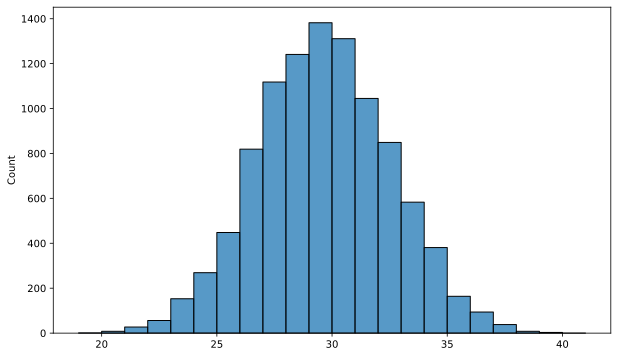

In [24]:
sns.histplot(np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1),
             bins=np.arange(19, 42));

- გრაფიკის მიხედვით თუ ვიმსჯელებთ, საშუალოდ სამი შეკვეთის 40 წუთზე მეტი მიღება თითქმის შეუძლებელია. 


- აქედან გამომდინარე:

  ან მეზობელი იტყუება;

  ან რატომღაც მიწოდება ჩვეულებრივზე მეტხანს გრძელდება.


- ზემოთ ორმოცი წუთის განმავლობაში გამოანგარიშებული Z მნიშვნელობა საშუალებას გაძლევთ შევაფასოთ ორმოცზე მეტი მნიშვნელობის პროპორცია (დადგომის ალბათობა):

In [25]:
1 - N_rv.cdf(2)

0.02275013194817921

- ამიტომ გასაკვირი არ არის, რომ 40 წუთზე მეტი ხნის განმავლობაში სამი მიტანის საშუალო დროის მიღების ალბათობა ძალიან მცირეა:

In [45]:
(1 - N_rv.cdf(2))**3

1.1774751750476762e-05

- თუ შეგვიძლია მივაწოდოთ თითოეული ინდივიდუალური მნიშვნელობა Z-მნიშვნელობის გამოყენებით, მაშინ ამ მნიშვნელობების საშუალო არითმეტიკულის ალბათობის შესაფასებლად, უნდა გამოვიყენოთ Z- სტატისტიკა:

  $$Z = \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

- დავუშვათ, რომ ჩვენ გავაკეთეთ სამი შეკვეთა და საშუალო მნიშვნელობა იყო 35 წუთი, შემდეგ Z- სტატისტიკა გამოითვლება შემდეგნაირად:

  $$Z = \frac{35-30}{\frac{5}{\sqrt{3}}} \approx 1.73$$
  

- სინამდვილეში, ჩვენ გვაინტერესებს, რა არის ალბათობა, რომ სამი მიწოდების საშუალო დრო ხვდება ინტერვალში:

  $$\begin{bmatrix}\mu - \left | \mu - \bar{x} \right |; \mu + \left | \mu - \bar{x} \right |\end{bmatrix}$$

  რაც ჩვენს შემთხვევაში [25; 35] წუთის შეადგენს.


- როგორც ადრე, ამ ალბათობის პოვნა შეგვიძლია მოდელირების გამოყენებით:

In [46]:
N = 10000
means = np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1)
means[(means>=25)&(means<=35)].size/N

0.9241

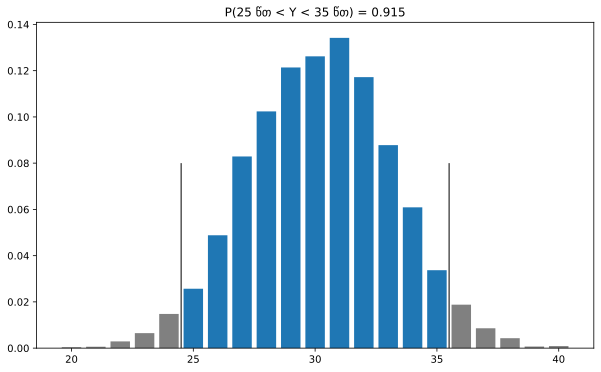

In [26]:
N = 10000
fig, ax = plt.subplots()
means = np.trunc(norm_rv.rvs(size=(N, 3))).mean(axis=1)
h = np.histogram(means, np.arange(19, 41))
ax.bar(np.arange(20, 25), h[0][0:5]/N, color='0.5')
ax.bar(np.arange(25, 36), h[0][5:16]/N)
ax.bar(np.arange(36, 41), h[0][16:22]/N, color='0.5')
p = np.sum(h[0][6:16]/N)
ax.set_title('P(25 წთ < Y < 35 წთ) = {:.3}'.format(p))
ax.vlines([24.5 ,35.5], 0, 0.08, color='k', lw=1);

- მეორეს მხრივ, ჩვენ შეგვიძლია გამოვთვალოთ იგივე ალბათობა ანალიტიკური გზით:

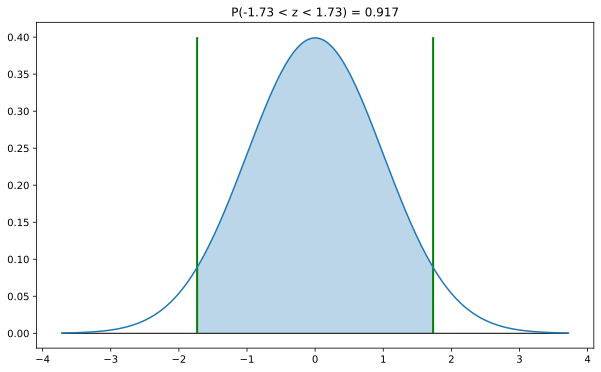

In [27]:
x, n, mu, sigma = 35, 3, 30, 5
z = abs((x - mu)/(sigma/n**0.5))

N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_z = x[(x>-z) & (x<z)] # & (x<z)
ax.fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p));

- მივაქციოთ ყურადღება, რომ Z-სტატისტიკა დამოკიდებულია როგორც ნიმუშის საშუალოზე $\bar {x}$, ისე ნიმუშის ზომაზე - $n$. 


- თუ პიცას 5, 30 ან 100-ჯერ შევუკვეთავთ, მაშინ რა ალბათობაა, რომ მიწოდების საშუალო დრო მოხვდება ინტერვალში [29; 31]? 

  მოდით შევხედოთ:

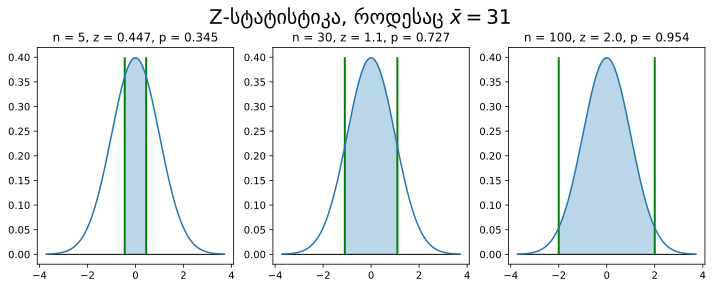

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))

for i, n in enumerate([5, 30, 100]):
    x, mu, sigma = 31, 30, 5
    z = abs((x - mu)/(sigma/n**0.5))

    N_rv = stats.norm()
    x = np.linspace(N_rv.ppf(0.0001), N_rv.ppf(0.9999), 300)
    ax[i].plot(x, N_rv.pdf(x))
    ax[i].hlines(0, x.min(), x.max(), lw=1, color='k')
    ax[i].vlines([-z, z], 0, 0.4, color='g', lw=2)
    x_z = x[(x>-z) & (x<z)] # & (x<z)
    ax[i].fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

    p = N_rv.cdf(z) - N_rv.cdf(-z)
    ax[i].set_title('n = {}, z = {:.3}, p = {:.3}'.format(n, z, p));
fig.suptitle(r'Z-სტატისტიკა, როდესაც $\bar{x} = 31$', fontsize = 20, y=1.02);

- 5 შეკვეთის შემთხვევაში, საშუალო ნიმუში ხვდება ინტერვალში [29; 31] უფრო შემთხვევით, ვიდრე სისტემატურად.


- 30 შეკვეთის შემთხვევაში, საშუალო მნიშვნელობის დაახლოებით მეოთხედი არასდროს მოხვდება მითითებულ ინტერვალში. 


- და მხოლოდ ასი შეკვეთის შემთხვევაში, მეტნაკლებად შეგვიძლია დარწმუნებული ვთქვათ, რომ პოპულაციის საშუალო მაჩვენებელიდან ნიმუშის გადახრა არ იქნება 1 წუთზე მეტი.


- მეორე მხრივ, შეგვიძლია სხვაგვარად ვიფიქროთ: თუ მოსახლეობის საშუალო რაოდენობა 30 წუთია, მაშინ რა ალბათობაა, რომ საშუალოდ 31 წუთი მივიღოთ, თუ 5, 30 ან 100 შეკვეთას გავაკეთებთ? 

  ცხადია, რომ $n = 5$ -ისთვის, ნიმუშის საშუალო მნიშვნელობა შეიძლება მნიშვნელოვნად გადახრას, შესაბამისად, $\bar {x} = 31$ წუთის მიღების ალბათობა ძალიან მაღალია. 
  
  მაგრამ $n = 100$–ისთვის, ნიმუშის საშუალო მნიშვნელობა პრაქტიკულად არ გადადის ზოგადი პოპულაციის საშუალო მაჩვენებელთან, ამიტომ თითქმის შეუძლებელია შემთხვევით $\bar {x} = 31$ $n = 100$–ით მიღება. 
  

- Რას ნიშნავს ეს? 

  ეს ნიშნავს, რომ თუ 100 შეკვეთა მივიღეთ და მიწოდების საშუალო დრო 31 წუთია, სავარაუდოდ, მცდარია ის ფაქტი, რომ პოპულაციის საშუალო 30 წუთია.


- რაც შეეხება ჩვენს მეზობელს, მაშინაც კი, თუ ლოდინის საშუალო დრო 40 წუთი იქნებოდა, Z- სტატისტიკური მონაცემი იქნებოდა $3.81$, ხოლო მრუდის ქვეშ არსებული ფართობი თითქმის 1 იქნებოდა:

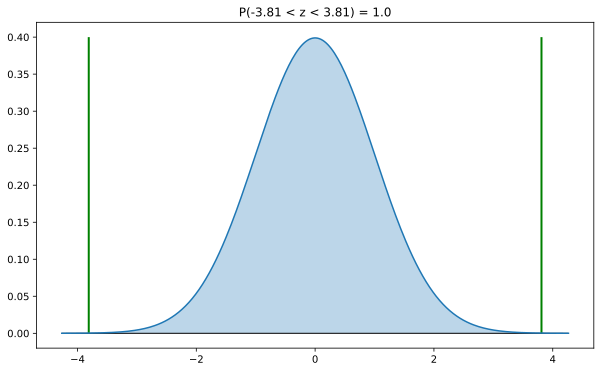

In [29]:
x, n, mu, sigma = 41, 3, 30, 5
z = abs((x - mu)/(sigma/3**0.5))

N_rv = stats.norm()
fig, ax = plt.subplots()
x = np.linspace(N_rv.ppf(1e-5), N_rv.ppf(1-1e-5), 300)
ax.plot(x, N_rv.pdf(x))
ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.vlines([-z, z], 0, 0.4, color='g', lw=2)
x_z = x[(x>-z) & (x<z)] # & (x<z)
ax.fill_between(x_z, N_rv.pdf(x_z), np.zeros(len(x_z)), alpha=0.3)

p = N_rv.cdf(z) - N_rv.cdf(-z)
ax.set_title('P({:.3} < z < {:.3}) = {:.3}'.format(-z, z, p));

- თავის მხრივ, ეს ნიშნავს, რომ ზოგადი პოპულაციიდან $\mu = 30$ და $\sigma = 5$-ით აღებული სამი მნიშვნელობის ნიმუშის საშუალო მნიშვნელობის შემთხვევითი გადახრის ალბათობა 10 წუთზე მეტხანს არის უკიდურესად მცირე. 


- ამ შემთხვევაში, ჩვენ შეგვიძლია დავასკვნათ მხოლოდ შემდეგი:

  ან ჩვენი მეზობელი მხოლოდ უკიდურესად "იღბლიანი" ადამიანია;

  ან პიცის მიწოდება ჩვეულებრივზე მეტხანს გრძელდება.  


- რომელია ამ წერტილებიდან ყველაზე სავარაუდო?  სავარაუდოდ, მეზობელი მართალია მიწოდების ხანგრძლივობაზე.

<h1 align="center">ლექციის დასასრული</h1>